# NHK COVID-19 Dataset
by Ou Deng, July 4, 2021

Data link: https://www3.nhk.or.jp/n-data/opendata/coronavirus/nhk_news_covid19_prefectures_daily_data.csv

Q: How it works?

A: It gets NHK COVID-19 dataset automatically and saves as working csv, then plots them.

Q: How to use this file?

A: Input in line77 of a_0 to choose which column of data.
   And input in line112 to choose the prefecture(s) to plot.

Data column names: 日付/都道府県コード/都道府県名/各地の感染者数_1日ごとの発表数/各地の感染者数_累計/各地の死者数_1日ごとの発表数/各地の死者数_累計

Data column names_EN: Date/Prefecture_ID/Name/Daily_Confirmed_Cases/Daily_Confirmed_Cases_Total/Daily_Death/Death_Total

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import io
import requests

import matplotlib.dates as mdates

#import datetime
#from datetime import datetime
#from dateutil import parser

In [2]:
# Need for py; no need for ipynb
# pd.set_option('display.max_column', None) # Just print first 10 lines.
# pd.set_option('display.max_rows', 20) # Just print first X lines.

In [3]:
# Pandas gets csv from url directly.
# Ref: https://stackoverflow.com/questions/32400867/pandas-read-csv-from-url

# NHK COVID-19 Dataset.
url="https://www3.nhk.or.jp/n-data/opendata/coronavirus/nhk_news_covid19_prefectures_daily_data.csv"
s=requests.get(url).content
data_all=pd.read_csv(io.StringIO(s.decode('utf-8')))

df0 = data_all.rename(columns = {'日付': 'Date', 
                                 '都道府県コード': 'Prefecture_ID', 
                                 '都道府県名':'Name',
                                 '各地の感染者数_1日ごとの発表数':'Daily_Confirmed_Cases',
                                 '各地の感染者数_累計':'Daily_Confirmed_Cases_Total',
                                 '各地の死者数_1日ごとの発表数':'Daily_Death',
                                 '各地の死者数_累計':'Death_Total'}, inplace = False)

In [4]:
df0

,Date,Prefecture_ID,Name,Daily_Confirmed_Cases,Daily_Confirmed_Cases_Total,Daily_Death,Death_Total
0,2020/1/16,1,北海道,0,0,0,0
1,2020/1/17,1,北海道,0,0,0,0
2,2020/1/18,1,北海道,0,0,0,0
3,2020/1/19,1,北海道,0,0,0,0
4,2020/1/20,1,北海道,0,0,0,0
...,...,...,...,...,...,...,...
25187,2021/6/30,47,沖縄県,67,20783,2,183
25188,2021/7/1,47,沖縄県,63,20846,4,187
25189,2021/7/2,47,沖縄県,61,20907,4,191
25190,2021/7/3,47,沖縄県,76,20983,0,191


In [5]:
# Test of reading df0

df1 = df0.loc[df0['Prefecture_ID'] == 1] # Select by Prefecture_ID. Ref: https://blog.csdn.net/htbeker/article/details/80332360

In [6]:
df1

,Date,Prefecture_ID,Name,Daily_Confirmed_Cases,Daily_Confirmed_Cases_Total,Daily_Death,Death_Total
0,2020/1/16,1,北海道,0,0,0,0
1,2020/1/17,1,北海道,0,0,0,0
2,2020/1/18,1,北海道,0,0,0,0
3,2020/1/19,1,北海道,0,0,0,0
4,2020/1/20,1,北海道,0,0,0,0
...,...,...,...,...,...,...,...
531,2021/6/30,1,北海道,38,41332,5,1399
532,2021/7/1,1,北海道,39,41371,1,1400
533,2021/7/2,1,北海道,26,41397,1,1401
534,2021/7/3,1,北海道,30,41427,2,1403


In [7]:
# Test of selecting specific prefectures and merging them.

Prefectures = df0.groupby(df0.Prefecture_ID) # ref: https://www.delftstack.com/ja/howto/python-pandas/split-pandas-dataframe/
df1 = Prefectures.get_group(1).set_index(['Date'])
df2 = Prefectures.get_group(2).set_index(['Date'])
df_1and2 = pd.concat([df1, df2], axis=1, ignore_index=False)

In [8]:
df_1and2

,Prefecture_ID,Name,Daily_Confirmed_Cases,Daily_Confirmed_Cases_Total,Daily_Death,Death_Total,Prefecture_ID,Name,Daily_Confirmed_Cases,Daily_Confirmed_Cases_Total,Daily_Death,Death_Total
Date,,,,,,,,,,,,
2020/1/16,1,北海道,0,0,0,0,2,青森県,0,0,0,0
2020/1/17,1,北海道,0,0,0,0,2,青森県,0,0,0,0
2020/1/18,1,北海道,0,0,0,0,2,青森県,0,0,0,0
2020/1/19,1,北海道,0,0,0,0,2,青森県,0,0,0,0
2020/1/20,1,北海道,0,0,0,0,2,青森県,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021/6/30,1,北海道,38,41332,5,1399,2,青森県,10,2500,0,31
2021/7/1,1,北海道,39,41371,1,1400,2,青森県,2,2502,0,31
2021/7/2,1,北海道,26,41397,1,1401,2,青森県,9,2511,0,31


In [9]:
df_1and2['Daily_Confirmed_Cases']

,Daily_Confirmed_Cases,Daily_Confirmed_Cases
Date,,
2020/1/16,0,0
2020/1/17,0,0
2020/1/18,0,0
2020/1/19,0,0
2020/1/20,0,0
...,...,...
2021/6/30,38,10
2021/7/1,39,2
2021/7/2,26,9


In [10]:
# Save as df_target.csv

df_target = pd.DataFrame(index=[], columns=[])  # Make an empty dataframe container.

Prefecture_IDs = df0["Prefecture_ID"].unique() # Make Prefecture_ID be unique.
for Prefecture_ID in Prefecture_IDs:
    df_read = Prefectures.get_group(Prefecture_ID).set_index(['Date'])
    df_target = pd.concat([df_target,df_read], axis=1,ignore_index=False)

# df_target saves as csv, the work file.
df_target.to_csv('df_target.csv',index=True, encoding='cp932')

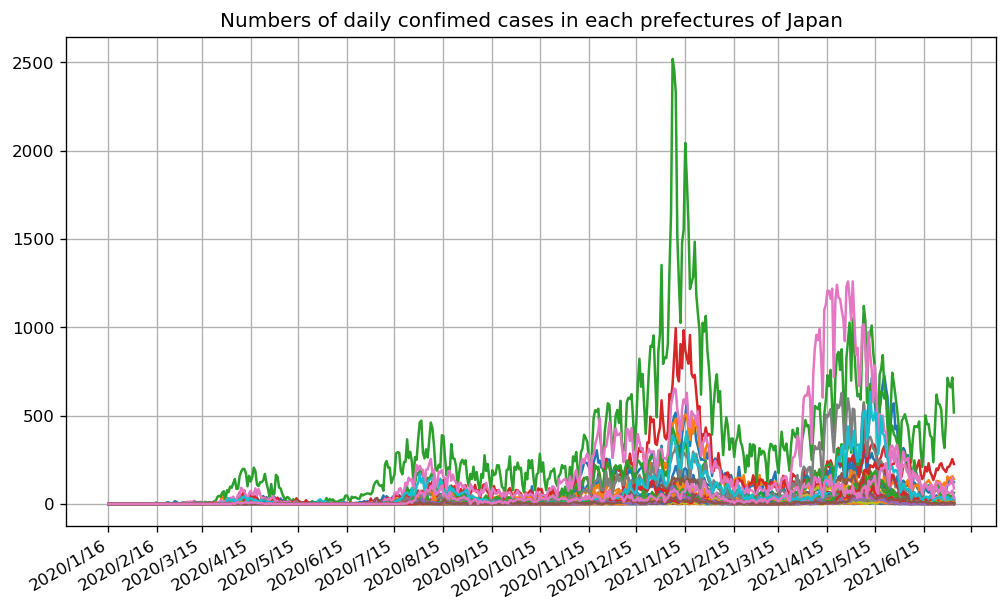

In [11]:
# Grapgy Daily_Confiormed_Cases in df_target

fig, ax = plt.subplots(1,1,figsize=(10,6), dpi=120)
plt.grid(axis='both') #axis='y'
fig.autofmt_xdate(bottom=0.2, rotation=30, ha='right') # Ref: https://codejzy.com/posts-1681716.html

plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) # MonthLocator() or DayLocator()

plt.title('Numbers of daily confimed cases in each prefectures of Japan')
plt.plot(df_target['Daily_Confirmed_Cases'])

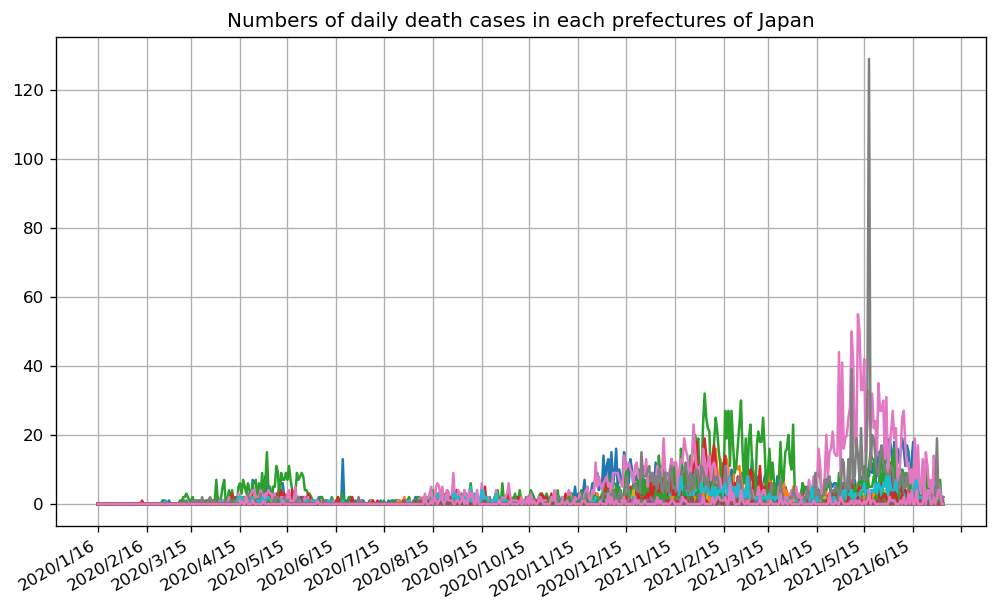

In [12]:
# Grapgy Daily_Death in df_target

fig, ax = plt.subplots(1,1,figsize=(10,6), dpi=120)
plt.grid(axis='both') #axis='y'
fig.autofmt_xdate(bottom=0.2, rotation=30, ha='right') # Ref: https://codejzy.com/posts-1681716.html

plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) # MonthLocator() or DayLocator()

plt.title('Numbers of daily death cases in each prefectures of Japan')
plt.plot(df_target['Daily_Death'])

In [13]:
# Make Prefecture_Dict and Prefecture_Dict_EN
# Ref: https://note.nkmk.me/python-dict-add-update/

Prefecture_IDs = df0["Prefecture_ID"].unique() # Make Prefecture_ID be unique.
Names = df0["Name"].unique() # Make Name be unique.

Names_EN =['Hokkaido', 'Aomori', 'Iwate', 'Miyagi', 'Akita', 'Yamagata', 'Fukushima', 'Ibaraki', 'Tochigi',
           'Gunma', 'Saitama', 'Chiba', 'Tokyo', 'Kanagawa', 'Niggata', 'Toyama', 'Ishikawa', 'Fukui',
           'Yamanashi', 'Nagano', 'Gifu', 'Shizuoka', 'Aichi', 'Mie', 'Shiga', 'Kyoto', 'Osaka',
           'Hyogo', 'Nara', 'Wakayama', 'Totori', 'Shimane', 'Okayama', 'Hiroshima', 'Yamaguchi', 'Tokushima',
           'Kagawa', 'Ehime', 'Kochi', 'Fukuoka', 'Saga', 'Nagasaki', 'Kumamoto', 'Oita', 'Miyazaki','Kagoshima', 'Okinawa']

Prefecture_Dict = {}
Prefecture_Dict_EN = {}

for Prefecture_ID in Prefecture_IDs:
    #df_read = Prefectures.get_group(Prefecture_ID).set_index(['Date'])
    #df_target = pd.concat([df_target,df_read], axis=1,ignore_index=False)
    Prefecture_Dict[Prefecture_ID] = Names[Prefecture_ID-1]
    Prefecture_Dict_EN[Prefecture_ID] = Names_EN[Prefecture_ID-1]

In [14]:
Prefecture_IDs

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

In [15]:
Names

array(['北海道', '青森県', '岩手県', '宮城県', '秋田県', '山形県', '福島県', '茨城県', '栃木県',
       '群馬県', '埼玉県', '千葉県', '東京都', '神奈川県', '新潟県', '富山県', '石川県', '福井県',
       '山梨県', '長野県', '岐阜県', '静岡県', '愛知県', '三重県', '滋賀県', '京都府', '大阪府',
       '兵庫県', '奈良県', '和歌山県', '鳥取県', '島根県', '岡山県', '広島県', '山口県', '徳島県',
       '香川県', '愛媛県', '高知県', '福岡県', '佐賀県', '長崎県', '熊本県', '大分県', '宮崎県',
       '鹿児島県', '沖縄県'], dtype=object)

In [16]:
Prefecture_Dict

{1: '北海道',
 2: '青森県',
 3: '岩手県',
 4: '宮城県',
 5: '秋田県',
 6: '山形県',
 7: '福島県',
 8: '茨城県',
 9: '栃木県',
 10: '群馬県',
 11: '埼玉県',
 12: '千葉県',
 13: '東京都',
 14: '神奈川県',
 15: '新潟県',
 16: '富山県',
 17: '石川県',
 18: '福井県',
 19: '山梨県',
 20: '長野県',
 21: '岐阜県',
 22: '静岡県',
 23: '愛知県',
 24: '三重県',
 25: '滋賀県',
 26: '京都府',
 27: '大阪府',
 28: '兵庫県',
 29: '奈良県',
 30: '和歌山県',
 31: '鳥取県',
 32: '島根県',
 33: '岡山県',
 34: '広島県',
 35: '山口県',
 36: '徳島県',
 37: '香川県',
 38: '愛媛県',
 39: '高知県',
 40: '福岡県',
 41: '佐賀県',
 42: '長崎県',
 43: '熊本県',
 44: '大分県',
 45: '宮崎県',
 46: '鹿児島県',
 47: '沖縄県'}

In [17]:
Prefecture_Dict_EN

{1: 'Hokkaido',
 2: 'Aomori',
 3: 'Iwate',
 4: 'Miyagi',
 5: 'Akita',
 6: 'Yamagata',
 7: 'Fukushima',
 8: 'Ibaraki',
 9: 'Tochigi',
 10: 'Gunma',
 11: 'Saitama',
 12: 'Chiba',
 13: 'Tokyo',
 14: 'Kanagawa',
 15: 'Niggata',
 16: 'Toyama',
 17: 'Ishikawa',
 18: 'Fukui',
 19: 'Yamanashi',
 20: 'Nagano',
 21: 'Gifu',
 22: 'Shizuoka',
 23: 'Aichi',
 24: 'Mie',
 25: 'Shiga',
 26: 'Kyoto',
 27: 'Osaka',
 28: 'Hyogo',
 29: 'Nara',
 30: 'Wakayama',
 31: 'Totori',
 32: 'Shimane',
 33: 'Okayama',
 34: 'Hiroshima',
 35: 'Yamaguchi',
 36: 'Tokushima',
 37: 'Kagawa',
 38: 'Ehime',
 39: 'Kochi',
 40: 'Fukuoka',
 41: 'Saga',
 42: 'Nagasaki',
 43: 'Kumamoto',
 44: 'Oita',
 45: 'Miyazaki',
 46: 'Kagoshima',
 47: 'Okinawa'}

### Matplotlib gallery: https://matplotlib.org/stable/gallery/index.html

#### Date Index Formatter: https://matplotlib.org/stable/gallery/ticks_and_spines/date_index_formatter2.html#sphx-glr-gallery-ticks-and-spines-date-index-formatter2-py

#### Monthly data sampel: https://qiita.com/damyarou/items/afbff7a909f2c1508fab

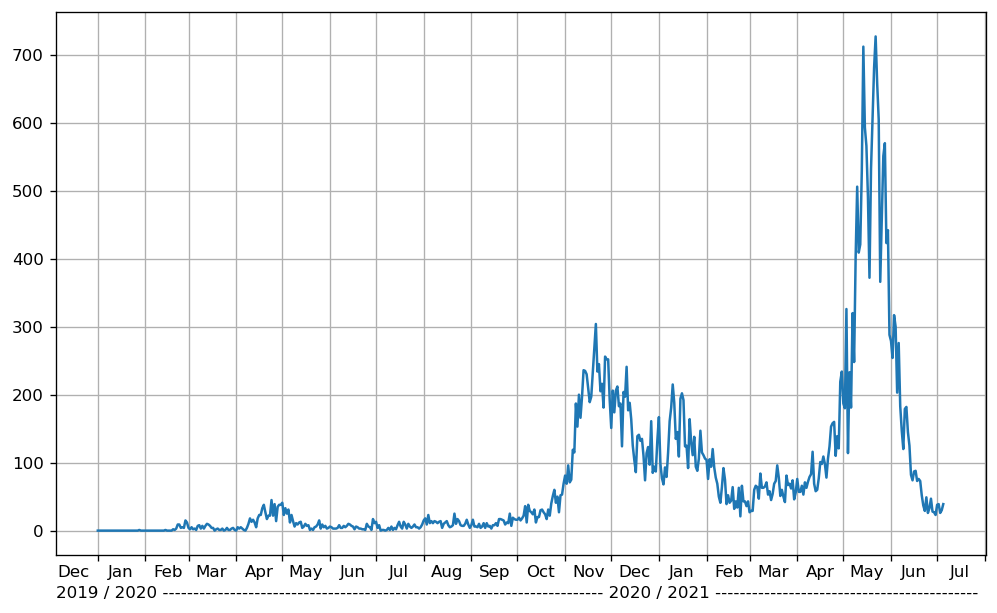

In [18]:
# Add 2020/1/1-15 = ZERO for monthly xaxis disply correctly.

import numpy as np
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

r_tmp = pd.DataFrame({"Date": ['2020/1/1','2020/1/2','2020/1/3','2020/1/4','2020/1/5','2020/1/6','2020/1/7','2020/1/8',
                               '2020/1/9','2020/1/10','2020/1/11','2020/1/12','2020/1/13','2020/1/14','2020/1/15'],
                      "Daily_Confirmed_Cases": [0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0]}).set_index("Date")

r = pd.DataFrame(df_target.iloc[:,2])
r = pd.concat([r_tmp, r]) # concat ref: https://qiita.com/hikaru_/items/e9c1356f674f2baa9e64

r['Date'] = r.index

fig, ax = plt.subplots(1,1,figsize=(10,6), dpi=120)
plt.grid(axis='both') #axis='y'

ax.plot(r['Date'],r['Daily_Confirmed_Cases'])

ax.xaxis.set_major_locator(mdates.MonthLocator())
# 16 is a slight approximation since months differ in number of days.
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=16))

ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

#ax.xaxis.set_major_formatter(lambda x, pos: str(x))
#ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')

ax.set_xlabel('2019 / 2020 ------------------------------------------------------------------------ 2020 / 2021 -------------------------------------------', loc='left')

plt.show()

In [19]:
r

,Daily_Confirmed_Cases,Date
Date,,
2020/1/1,0,2020/1/1
2020/1/2,0,2020/1/2
2020/1/3,0,2020/1/3
2020/1/4,0,2020/1/4
2020/1/5,0,2020/1/5
...,...,...
2021/6/30,38,2021/6/30
2021/7/1,39,2021/7/1
2021/7/2,26,2021/7/2


# Final Version

### Modify csv with 2020/1/1-15 ZERO by contating df_target_tmp.csv and df_target.csv
* Basing on df0(the raw vertical data of NHK source), df_target.csv is made in Line10 with EN column names and shifted to landscape date.
* df_target_tmp.csv is manually made as a tatic temp file just for monthly xaxis disply as Line18 described.
* Contating purpose is just for right plot dispaying with better graphs.
* Graph of the chosen prefectures or all of them.
* Finally, combinate codes.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

import io
import requests

# NHK COVID-19 Dataset.
url="https://www3.nhk.or.jp/n-data/opendata/coronavirus/nhk_news_covid19_prefectures_daily_data.csv"
s=requests.get(url).content
data_all=pd.read_csv(io.StringIO(s.decode('utf-8')))

df0 = data_all.rename(columns = {'日付': 'Date', 
                                 '都道府県コード': 'Prefecture_ID', 
                                 '都道府県名':'Name',
                                 '各地の感染者数_1日ごとの発表数':'Daily_Confirmed_Cases',
                                 '各地の感染者数_累計':'Daily_Confirmed_Cases_Total',
                                 '各地の死者数_1日ごとの発表数':'Daily_Death',
                                 '各地の死者数_累計':'Death_Total'}, inplace = False)

df_target = pd.DataFrame(index=[], columns=[])  # Make an empty dataframe container.

Prefecture_IDs = df0["Prefecture_ID"].unique() # Make Prefecture_ID be unique.

# ref: https://www.delftstack.com/ja/howto/python-pandas/split-pandas-dataframe/
Prefectures = df0.groupby(df0.Prefecture_ID)

for Prefecture_ID in Prefecture_IDs:
    df_tmp = Prefectures.get_group(Prefecture_ID).set_index(['Date'])
    df_target = pd.concat([df_target,df_tmp], axis=1, ignore_index=False)

# df_target saves as csv, the work file.
df_target.to_csv('df_target.csv',index=True, encoding='cp932')

# Load df_target.csv and df_target_tmp.csv to contat, then asve as df_target_all.csv.
df_target_tmp = pd.read_csv('df_target_tmp.csv', parse_dates=True, index_col='Date', encoding='cp932')
df_target = pd.read_csv('df_target.csv', parse_dates=True, index_col='Date', encoding='cp932')

df_target_all = pd.concat([df_target_tmp, df_target], axis=0)
df_target_all.to_csv('df_target_all.csv',index=True, encoding='cp932')

# REF: https://www.cnpython.com/qa/367000

In [13]:
df_target

,Prefecture_ID,Name,Daily_Confirmed_Cases,Daily_Confirmed_Cases_Total,Daily_Death,Death_Total,Prefecture_ID.1,Name.1,Daily_Confirmed_Cases.1,Daily_Confirmed_Cases_Total.1,...,Daily_Confirmed_Cases.45,Daily_Confirmed_Cases_Total.45,Daily_Death.45,Death_Total.45,Prefecture_ID.46,Name.46,Daily_Confirmed_Cases.46,Daily_Confirmed_Cases_Total.46,Daily_Death.46,Death_Total.46
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-16,1,北海道,0,0,0,0,2,青森県,0,0,...,0,0,0,0,47,沖縄県,0,0,0,0
2020-01-17,1,北海道,0,0,0,0,2,青森県,0,0,...,0,0,0,0,47,沖縄県,0,0,0,0
2020-01-18,1,北海道,0,0,0,0,2,青森県,0,0,...,0,0,0,0,47,沖縄県,0,0,0,0
2020-01-19,1,北海道,0,0,0,0,2,青森県,0,0,...,0,0,0,0,47,沖縄県,0,0,0,0
2020-01-20,1,北海道,0,0,0,0,2,青森県,0,0,...,0,0,0,0,47,沖縄県,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,1,北海道,38,41332,5,1399,2,青森県,10,2500,...,3,3674,0,38,47,沖縄県,67,20783,2,183
2021-07-01,1,北海道,39,41371,1,1400,2,青森県,2,2502,...,4,3678,0,38,47,沖縄県,63,20846,4,187
2021-07-02,1,北海道,26,41397,1,1401,2,青森県,9,2511,...,11,3689,0,38,47,沖縄県,61,20907,4,191


In [14]:
# df_target_all:
# index: Date
# iloc: (0)Prefecture_ID, (1)Name, (2)Daily_Confirmed_Cases, (3)Daily_Confirmed_Cases_Total, (4)Daily_Death, (5)Death_Total, 

Col_Dict = {'0':'Prefecture_ID', '1':'Name', '2':'Daily_Confirmed_Cases', '3':'Daily_Confirmed_Cases_Total',
            '4':'Daily_Death', '5':'Death_Total'}

# Prefecture_Dict
Prefecture_Dict = {'1': 'Hokkaido','2': 'Aomori','3': 'Iwate','4': 'Miyagi','5': 'Akita','6': 'Yamagata','7': 'Fukushima',
                   '8': 'Ibaraki','9': 'Tochigi','10': 'Gunma','11': 'Saitama','12': 'Chiba','13': 'Tokyo','14': 'Kanagawa',
                   '15': 'Niggata','16': 'Toyama','17': 'Ishikawa','18': 'Fukui','19': 'Yamanashi','20': 'Nagano',
                   '21': 'Gifu','22': 'Shizuoka','23': 'Aichi','24': 'Mie','25': 'Shiga','26': 'Kyoto','27': 'Osaka',
                   '28': 'Hyogo','29': 'Nara','30': 'Wakayama','31': 'Totori','32': 'Shimane','33': 'Okayama','34': 'Hiroshima',
                   '35': 'Yamaguchi','36':'Tokushima','37': 'Kagawa','38': 'Ehime','39': 'Kochi','40': 'Fukuoka',
                   '41': 'Saga','42': 'Nagasaki','43': 'Kumamoto','44': 'Oita','45': 'Miyazaki','46': 'Kagoshima','47': 'Okinawa'}

# If graph "Daily_Confirmed_Cases", column iloc=2,8,14..., a_n = a_0+6*(n-1)
# e.g. r = pd.DataFrame(df_target_all.iloc[:,2])

a_0 = 2  # Choose in Col_Dict.

df_target = pd.DataFrame(index=[], columns=[])  # Make an empty dataframe container.

for i in range(1, 48):
    col = a_0 + 6*(i-1)
    
    if col < 5:
        Col_Dict_Key = Col_Dict[str(a_0)]
    else:
        Col_Dict_Key = Col_Dict[str(a_0)]+'.'+str(i-1)
            
    df_target_tmp = df_target_all.iloc[:,[col]].rename(columns = {Col_Dict_Key:Prefecture_Dict[str(i)]}, inplace = False)
    df_target = pd.concat([df_target, df_target_tmp], axis=1, ignore_index=False)
    
    # Ref:
    #r = pd.DataFrame(df_target.iloc[:,2])
    #df_1and2 = pd.concat([df1, df2], axis=1, ignore_index=False)
    #.rename(columns = {'日付': 'Date'}, inplace = False)

file = 'data_target_' + str(a_0) +'.csv'
df_target.to_csv(file, index=True, encoding='cp932')

In [15]:
df_target

,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,Gunma,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,38,10,9,6,13,0,14,27,29,4,...,0,4,43,0,7,6,0,2,3,67
2021-07-01,39,2,2,14,15,0,26,26,27,1,...,0,7,26,6,12,1,1,4,4,63
2021-07-02,26,9,12,23,7,2,19,23,29,5,...,1,10,24,2,8,1,0,5,11,61


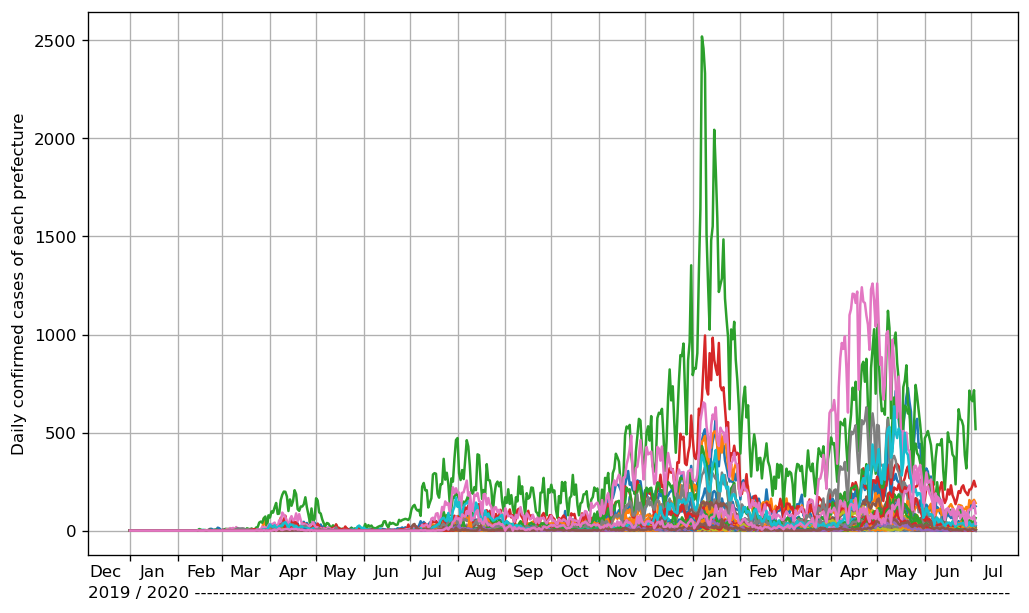

In [19]:
# Graph all Japan data.

fig, ax = plt.subplots(1,1,figsize=(10,6), dpi=120)
plt.grid(axis='both') #axis='y'

ax.plot(df_target)

ax.xaxis.set_major_locator(mdates.MonthLocator())
# 16 is a slight approximation since months differ in number of days.
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=16))

ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

ax.set_ylabel('Daily confirmed cases of each prefecture', color='black')

#ax.xaxis.set_major_formatter(lambda x, pos: str(x))
#ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')

ax.set_xlabel('2019 / 2020 ------------------------------------------------------------------------ 2020 / 2021 -------------------------------------------', loc='left')

plt.show()

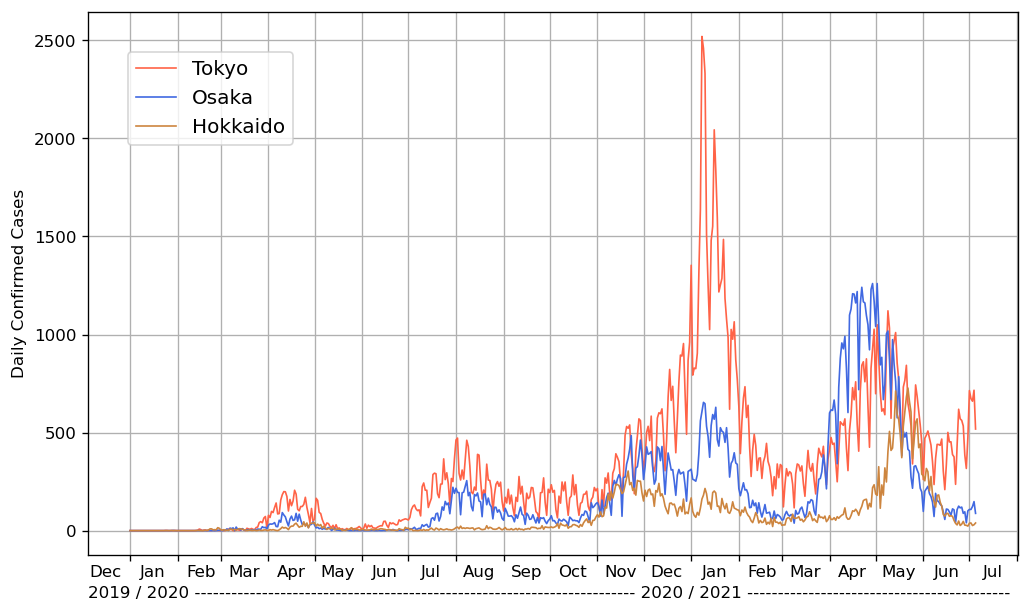

In [17]:

fig, ax = plt.subplots(1,1,figsize=(10,6), dpi=120)
plt.grid(axis='both') #axis='y'

# Input the prefecture(s) to disply.
Prefecture_Dict = {'1': 'Hokkaido','2': 'Aomori','3': 'Iwate','4': 'Miyagi','5': 'Akita','6': 'Yamagata','7': 'Fukushima',
                   '8': 'Ibaraki','9': 'Tochigi','10': 'Gunma','11': 'Saitama','12': 'Chiba', '13': 'Tokyo','14': 'Kanagawa',
                   '15': 'Niggata','16': 'Toyama','17': 'Ishikawa','18': 'Fukui','19': 'Yamanashi','20': 'Nagano',
                   '21': 'Gifu','22': 'Shizuoka','23': 'Aichi','24': 'Mie','25': 'Shiga','26': 'Kyoto','27': 'Osaka',
                   '28': 'Hyogo','29': 'Nara','30': 'Wakayama','31': 'Totori','32': 'Shimane','33': 'Okayama','34': 'Hiroshima',
                   '35': 'Yamaguchi','36':'Tokushima','37': 'Kagawa','38': 'Ehime','39': 'Kochi','40': 'Fukuoka',
                   '41': 'Saga','42': 'Nagasaki','43': 'Kumamoto','44': 'Oita','45': 'Miyazaki','46': 'Kagoshima','47': 'Okinawa'}

to_display = [13, 27, 1]
    

L1 = df_target[Prefecture_Dict[str(to_display[0])]].tolist()
L2 = df_target[Prefecture_Dict[str(to_display[1])]].tolist()
L3 = df_target[Prefecture_Dict[str(to_display[2])]].tolist()

#L2 = df_target['Osaka'].tolist()
#L3 = df_target['Hokkaido'].tolist()

ax.set_ylabel('Daily Confirmed Cases', color='black')
ax.plot(L1, color='tomato', linewidth=1.0, linestyle='-', label=Prefecture_Dict[str(to_display[0])])
ax.plot(L2, color='royalblue', linewidth=1.0, linestyle='-', label=Prefecture_Dict[str(to_display[1])])
ax.plot(L3, color='peru', linewidth=1.0, linestyle='-', label=Prefecture_Dict[str(to_display[2])])

ax.legend(loc='upper left', borderaxespad=2, fontsize=12)

ax.xaxis.set_major_locator(mdates.MonthLocator())
# 16 is a slight approximation since months differ in number of days.
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=16))

ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')

ax.set_xlabel('2019 / 2020 ------------------------------------------------------------------------ 2020 / 2021 -------------------------------------------', loc='left')

plt.show()